In [62]:
# Import required libraries
import gymnasium as gym
from gymnasium import spaces
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

In [63]:
grid = np.zeros((4,4)) #this is how you define a 4x4 grid
print(grid)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


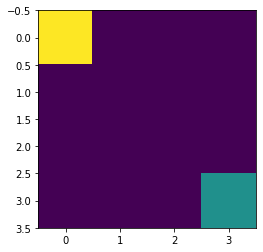

In [64]:
pos1 = [0,0] #start position of our agent
pos2 = [3,3] #goal position of our agent
grid[tuple(pos1)] = 1
grid[tuple(pos2)] = 0.5

plt.imshow(grid)

In [282]:
class GridEnvironment(gym.Env):
    metadata = {'render.modes': []}

    def __init__(self):
        self.observation_space = spaces.Discrete(16)
        self.action_space = spaces.Discrete(4)
        self.max_timesteps = 10
        self.done = False
        self.timestep = 0
        

    def reset(self):
        self.state = np.zeros((4, 4))
        self.done = False
        self.agent_pos = [0, 0]
        self.goal_pos = [3, 3]
        self.state = np.zeros((4, 4))
        self.state[tuple(self.agent_pos)] = 1  # Initial agent position
        self.state[tuple(self.goal_pos)] = 0.5  # Goal position

        self.rocks = [(2, 0), (1, 2)]  # Rocks positions
        for rock_pos in self.rocks:
            self.state[rock_pos] = -1  # Rocks as negative rewards

        self.rewards = [(1, 0), (3, 1)]  # Positions where the agent receives positive rewards
        for reward_pos in self.rewards:
            self.state[reward_pos] = 2  # Positive rewards at reward positions

        observation = self.state.flatten()
        return observation

    def step(self, action):
        if action == 0:  # Down
            self.agent_pos[0] += 1
        elif action == 1:  # Up
            self.agent_pos[0] -= 1
        elif action == 2:  # Right
            self.agent_pos[1] += 1
        elif action == 3:  # Left
            self.agent_pos[1] -= 1

        # Comment this to demonstrate the truncation condition.
        self.agent_pos = np.clip(self.agent_pos, 0, 3)

        self.state = np.zeros((4, 4))
        self.state[tuple(self.agent_pos)] = 1
        self.state[tuple(self.goal_pos)] = 0.5

        for rock_pos in self.rocks:
            self.state[rock_pos] = -1

        for reward_pos in self.rewards:
            self.state[reward_pos] = 2 

        observation = self.state.flatten()

        reward = 0
        if np.array_equal(self.agent_pos, self.goal_pos):
            reward = 20  # Positive reward for reaching the goal
            self.done = True
        elif tuple(self.agent_pos) in self.rocks:
            # Assign individual rewards for each rock position
            if tuple(self.agent_pos) == (2, 0):
                reward = -3  # Negative reward for hitting the rock at (1, 1)
            elif tuple(self.agent_pos) == (1, 2):
                reward = -4  # Negative reward for hitting the rock at (2, 2)
        elif tuple(self.agent_pos) in self.rewards:
            # Assign individual rewards for each reward position
            if tuple(self.agent_pos) == (1, 0):
                reward = 2  # Positive reward for being at the reward position (0, 3)
            elif tuple(self.agent_pos) == (3, 1):
                reward = 5  # Positive reward for being at the reward position (3, 0)

        self.timestep += 1

        terminated = True if self.timestep >= self.max_timesteps else False

        agentState = self.agent_pos
        isDone = self.done
        timestepCount = self.timestep

        return observation, reward, terminated, agentState, isDone, timestepCount

    def render(self):
        plt.title('Grid World')

        # Visualize rocks as red squares
        for rock_pos in self.rocks:
            plt.scatter(rock_pos[1], rock_pos[0], color='red', marker='s', s=300)

        # Visualize rocks as red squares
        for reward_pos in self.rewards:
            plt.scatter(reward_pos[1], reward_pos[0], color='orange', marker='P', s=300)

        # Visualize the agent as a green circle
        plt.scatter(self.agent_pos[1], self.agent_pos[0], color='green', marker='o', s=300)

        # Visualize the goal as a blue star
        plt.scatter(self.goal_pos[1], self.goal_pos[0], color='blue', marker='*', s=300)
        plt.imshow(self.state)
        plt.show()
        


In [283]:
actionsEquivalent = {0:'Down', 1:'Up', 2:'Right', 3:'Left'}
statesEquivalent = {(0,0):'S1', (0,1):'S2', (0,2):'S3', (0,3):'S4', (1,0):'S5', (1,1):'S6', (1,2):'S7', 
                    (1,3):'S8',(2,0):'S9',(2,1):'S10',(2,2):'S11', (2,3):'S12', (3,0):'S13', (3,1):'S14', 
                    (3,2):'S15', (3,3):'S16'}

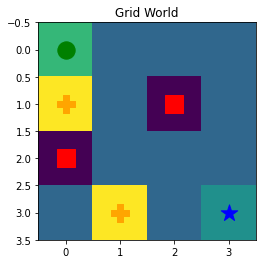

In [285]:
env = GridEnvironment()

obs = env.reset()
env.render()

Reward = 0, Action = Up, Current State = S1 = (0, 0)


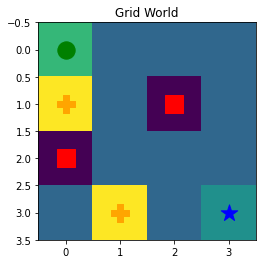

In [286]:
action = 1
observation, reward, terminated, state, done, timestepCount = env.step(action)
print(f"Reward = {reward}, Action = {actionsEquivalent[action]}, Current State = {statesEquivalent[tuple(state)]} = {tuple(state)}")
env.render()

Reward = 0, Action = Right, Current State = S2 = (0, 1)


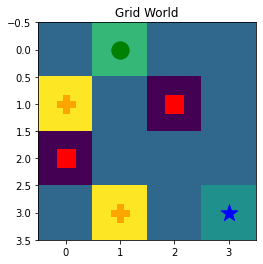

In [287]:
action = 2
observation, reward, terminated, state, done, timestepCount = env.step(action)
print(f"Reward = {reward}, Action = {actionsEquivalent[action]}, Current State = {statesEquivalent[tuple(state)]} = {tuple(state)}")
env.render()

Reward = 0, Action = Left, Current State = S1 = (0, 0)


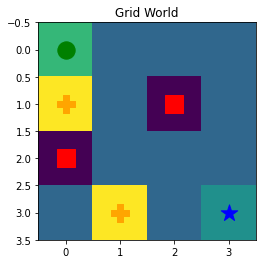

In [288]:
action = 3
observation, reward, terminated, state, done, timestepCount = env.step(action)
print(f"Reward = {reward}, Action = {actionsEquivalent[action]}, Current State = {statesEquivalent[tuple(state)]} = {tuple(state)}")
env.render()

In [289]:
# Definition an agent that takes action randomly
class RandomAgent:

  def __init__(self, env):
    self.env = env
    self.observation_space = env.observation_space
    self.action_space = env.action_space

  def step(self, obs):
    """Takes a step in the environment by choosing an action randomly.

    Args:
        obs: The current observation.

    Returns:
        The action to take.
    """
    return np.random.choice(self.action_space.n)

Timestep: 1

Current State: S5 = (1, 0) | Action = Down | Reward = 2 | Done = False | Terminated:False


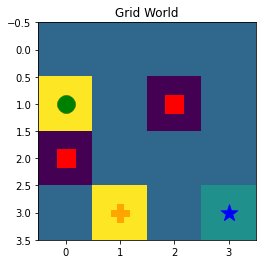

Timestep: 2

Current State: S1 = (0, 0) | Action = Up | Reward = 0 | Done = False | Terminated:False


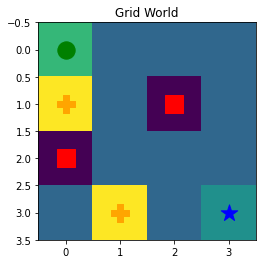

Timestep: 3

Current State: S5 = (1, 0) | Action = Down | Reward = 2 | Done = False | Terminated:False


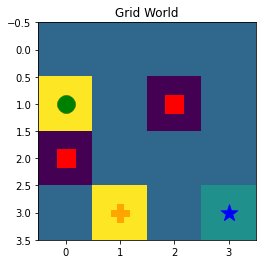

Timestep: 4

Current State: S1 = (0, 0) | Action = Up | Reward = 0 | Done = False | Terminated:False


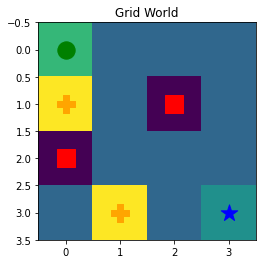

Timestep: 5

Current State: S5 = (1, 0) | Action = Down | Reward = 2 | Done = False | Terminated:False


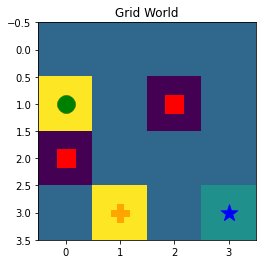

Timestep: 6

Current State: S5 = (1, 0) | Action = Left | Reward = 2 | Done = False | Terminated:False


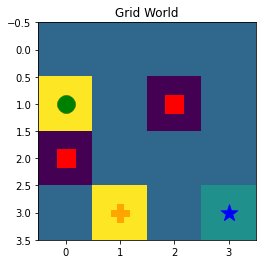

Timestep: 7

Current State: S1 = (0, 0) | Action = Up | Reward = 0 | Done = False | Terminated:False


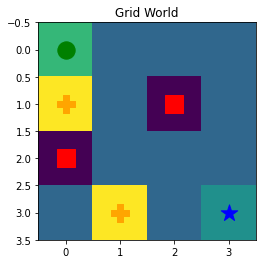

Timestep: 8

Current State: S2 = (0, 1) | Action = Right | Reward = 0 | Done = False | Terminated:False


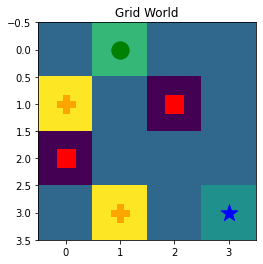

Timestep: 9

Current State: S6 = (1, 1) | Action = Down | Reward = 0 | Done = False | Terminated:False


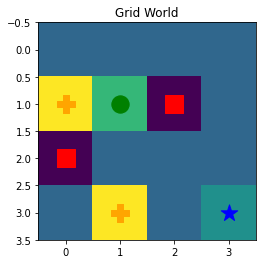

Timestep: 10

Current State: S7 = (1, 2) | Action = Right | Reward = -4 | Done = False | Terminated:True


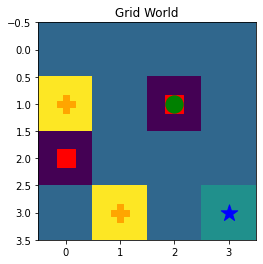

In [290]:
# Sample code for environment and agent implementation. Also shows
# visualization of the random agent's movement across the grid. The yellow cell
# shows the movement of the agent.

if __name__ == '__main__':
  env = GridEnvironment()
  agent = RandomAgent(env)

  obs = env.reset()
  terminated = False

  while not terminated:
    action = agent.step(obs)
    observation, reward, terminated, state, done, timestepCount = env.step(action)
    stateTup = tuple(state)
    print(f"Timestep: {timestepCount}")
    print(f"\nCurrent State: {statesEquivalent[stateTup]} = {stateTup} | Action = {actionsEquivalent[action]} | Reward = {reward} | Done = {done} | Terminated:{terminated}")
    env.render()

In [354]:

# SARSA algorithm for OpenAI Gym environment
def sarsa(testing=False):
    env = GridEnvironment()
    obs = env.reset()#resets the environment to its initial configuration
    current_state = 0  # s1
    action_val = [0, 1, 2, 3]

    # Intialize parameters
    learning_rate = 0.15  # alpha
    discount_factor = 0.95  # how much weightage to put on future rewards
    det_epsilon = 0.99
    timesteps = 15
    episodes = 1000

    # Initialize Q-values
    action_space_size = env.action_space.n
    state_space_size = env.observation_space.n
    Q = np.zeros((state_space_size, action_space_size))

    # Mapping next_state co-ordinates to q_table co-ordinates
    states = {(0, 0): 0, (0, 1): 1, (0, 2): 2, (0, 3): 3,
              (1, 0): 4, (1, 1): 5, (1, 2): 6, (1, 3): 7,
              (2, 0): 8, (2, 1): 9, (2, 2): 10, (2, 3): 11,
              (3, 0): 12, (3, 1): 13, (3, 2): 14, (3, 3): 15}  # 16 states
    
    #Empty lists to store values
    optimal = []
    reward_values = []
    total_timesteps = []
    epsilon_values = []
    eva_rewards = []

    done = False  # signifies if agent reached terminal or not
    total_episodes = episodes
    eva_episodes = 10
    avg_timesteps = 0
    # multiply by 0.995 for each episode(#after 30 iterations# or terminal state reached)
    epsilon = 1
    decay_factor = (0.01/1)**(1/total_episodes)
    target = np.array([3, 3])
    closeTarget = [(3, 2), (2, 3)]

    #For testing results
    if testing: 
        total_episodes += eva_episodes 
        print("Evaluation Results")

    # Epsilon-greedy policy
    def epsilon_greedy_policy(Q, state, epsilon):
        if np.random.random() < epsilon:
            # Exploration: choose a random action
            return np.random.choice(action_val)
        else:
            # Exploitation: choose the action with the highest Q-value
            return np.argmax(Q[state])

    for episode in range(1, total_episodes+1):
        env.reset()
        current_state = 0
        total_rewards = 0
        timestep = 0
        curr_action = epsilon_greedy_policy(Q, current_state, epsilon)

        while timestep != timesteps:
            # Take the chosen action
            _, reward, _, agentState, done, _ = env.step(curr_action)
            next_state = states[tuple(agentState)]
            
            # Assign maximum reward when it reaches goal
            if reward == 20:
                reward += 100

            # When its about to reach the goal assign higher reward
            for agent in closeTarget:
                if (agent == agentState).all():
                    reward += 5 

            next_action = epsilon_greedy_policy(Q, next_state, epsilon)

            # Update Q-value using SARSA update rule
            Q[current_state][curr_action] = Q[current_state][curr_action] + learning_rate * \
                (reward + discount_factor*Q[next_state]
                 [next_action] - Q[current_state][curr_action])
            
            if episode == total_episodes:
                optimal.append(current_state+1)

            timestep += 1
            total_rewards += reward
            
            current_state = next_state
            curr_action = next_action

            if done:
                break

        #Results after each episode
        avg_timesteps += timestep #Capturing all timesteps for all 100 episodes
        total_timesteps.append(avg_timesteps)

        reward_values.append(total_rewards) #Append rewards in every episode
        epsilon_values.append(epsilon) #Append epsilon values in every episode


        if epsilon > 0.01: #keeping epsilon in [0.01 - 1] range as if it falls below 0.01 it will exploit more: choosing best actions. We want our agent to explore a bit: choosing random actions
            epsilon = epsilon*decay_factor
        else:
            epsilon = 0.01


        if (episode % 100) == 0 and testing == False: #printing results for every 100 episodes
            print("Episode: {}, Rewards: {}, Average timesteps taken: {}, epsilon: {}".format(episode, total_rewards, avg_timesteps//100, epsilon))
            avg_timesteps = 0

        #testing results
        if testing:
            if episode > total_episodes - eva_episodes:
                eva_rewards.append(reward)

        #printing the optimal path in last episode
        if episode == total_episodes:
            print("Optimal Path: ")
            for i in optimal:
                print(i,"->", end = " ")
            print(next_state+1)

    print("Q Table: \n", Q)

    #Plotting the results
    #x, y co-ordinates
    x = [episode for episode in range(total_episodes)]
    yr = reward_values
    ye = epsilon_values

    yr_eva = eva_rewards
    x_eva = [episode for episode in range(eva_episodes)]
    

    if testing:
        #episodes vs rewards
        plt.plot(x_eva,yr_eva)
        plt.title("Rewards per episode")
        plt.xlabel('Episodes')
        plt.ylabel('Rewards')

    else:
        #episodes vs epsilon
        #Plots showing episodes vs epsilon, episodes vs rewards
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
        ax1.plot(x, ye)
        ax1.set_title("Epsilon decay")

        #episodes vs rewards
        ax2.plot(x,yr)
        ax2.set_title("Rewards per episode")



Evaluation Results
Optimal Path: 
1 -> 5 -> 6 -> 10 -> 9 -> 10 -> 11 -> 15 -> 16
Q Table: 
 [[ 98.29860904  81.48207564  78.25432133  75.11074195]
 [ 95.3355709   28.72235872   6.20381998  27.60239166]
 [ 32.08956393  -0.58987054   3.36059607   7.71888049]
 [ 17.60845124   0.           2.29003448  -0.19883141]
 [ 67.96668185  73.8183227  101.07075851  78.3611505 ]
 [102.77925039  78.41831282  90.21070708  86.84111342]
 [111.83440233   5.46667286  36.03311303  17.62422693]
 [ 93.36783505   0.2660418    7.64540689  11.50294566]
 [ 21.82441555  35.24180341 104.58987098  34.85819838]
 [102.96378039  90.64863631 112.30406856  88.58932748]
 [118.7528374   87.47113897 101.26515598  92.88164672]
 [119.88928791  33.76272444  68.10331144  60.31477525]
 [ 10.9477186   -1.52372667  81.3419895   15.02690713]
 [ 65.16188547  67.23315092 118.97262254  32.49648753]
 [115.14980751 104.96386475 120.          92.22104778]
 [  0.           0.           0.           0.        ]]


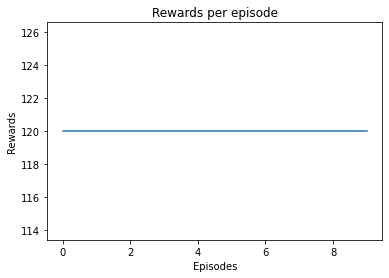

In [355]:
sarsa(testing=True)